In [1]:
import numpy as np
import itertools
from itertools import product
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def frecuencia_modos(nx, ny, nz, lx, ly, lz, c0=343):
    return (c0 / 2) * np.sqrt((nx / lx) ** 2 + (ny / ly) ** 2 + (nz / lz) ** 2)

In [3]:
def clasificar_modo(nx, ny, nz):
    num_ceros = sum([nx == 0, ny == 0, nz == 0])
    if num_ceros == 2:
        return "Axial"
    elif num_ceros == 1:
        return "Tangencial"
    else:
        return "Oblicuo"

In [4]:
# Dimensiones del recinto en metros
lx, ly, lz = 3, 4, 3.5

In [5]:
modos = itertools.product(range(6), repeat=3)  # Genera combinaciones de (nx, ny, nz)
frecuencias = [(nx, ny, nz, frecuencia_modos(nx, ny, nz, lx, ly, lz)) for nx, ny, nz in modos]
frecuencias = [f for f in frecuencias if f[3] > 0]
frecuencias.sort(key=lambda x: x[3])

In [6]:
print("Las 10 frecuencias más bajas son:")
for i, (nx, ny, nz, f) in enumerate(frecuencias[:10], 1):
    tipo = clasificar_modo(nx, ny, nz)
    print(f"{i}. Modo ({nx},{ny},{nz}): {f:.2f} Hz - {tipo}")

Las 10 frecuencias más bajas son:
1. Modo (0,1,0): 42.88 Hz - Axial
2. Modo (0,0,1): 49.00 Hz - Axial
3. Modo (1,0,0): 57.17 Hz - Axial
4. Modo (0,1,1): 65.11 Hz - Tangencial
5. Modo (1,1,0): 71.46 Hz - Tangencial
6. Modo (1,0,1): 75.29 Hz - Tangencial
7. Modo (0,2,0): 85.75 Hz - Axial
8. Modo (1,1,1): 86.64 Hz - Oblicuo
9. Modo (0,0,2): 98.00 Hz - Axial
10. Modo (0,2,1): 98.76 Hz - Tangencial


<function matplotlib.pyplot.show(close=None, block=None)>

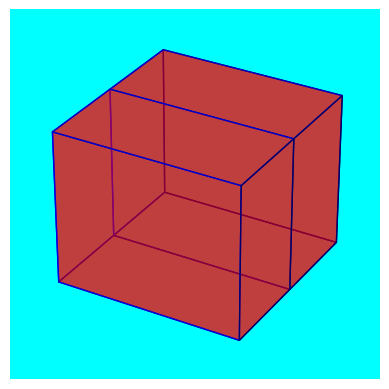

In [7]:
cube = np.ones((1,2,1), dtype = "bool")

fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.set_facecolor("Cyan")
ax.voxels(cube, facecolor = "r", edgecolors = 'b', alpha = 0.5)
ax.axis('off')
plt.show

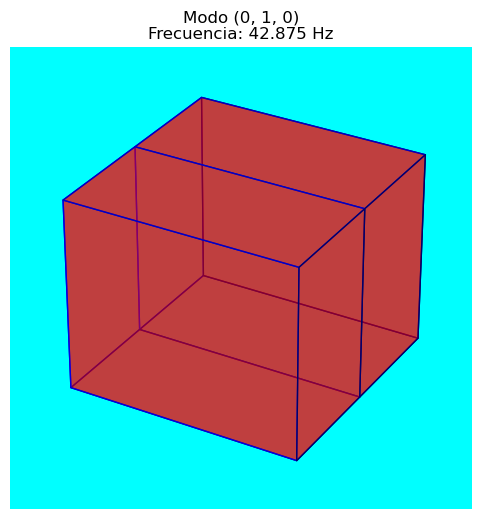

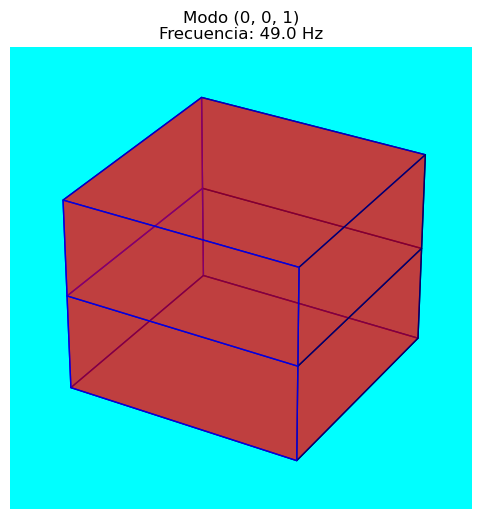

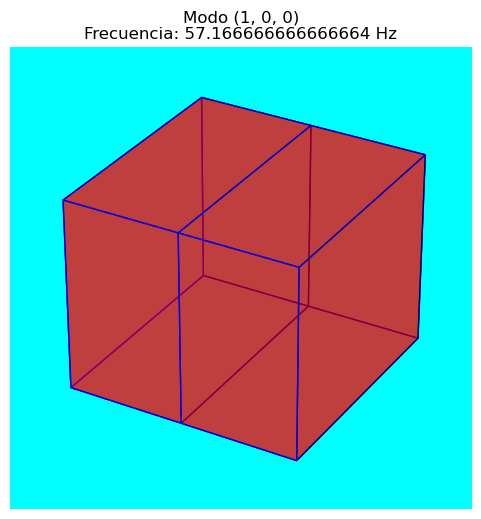

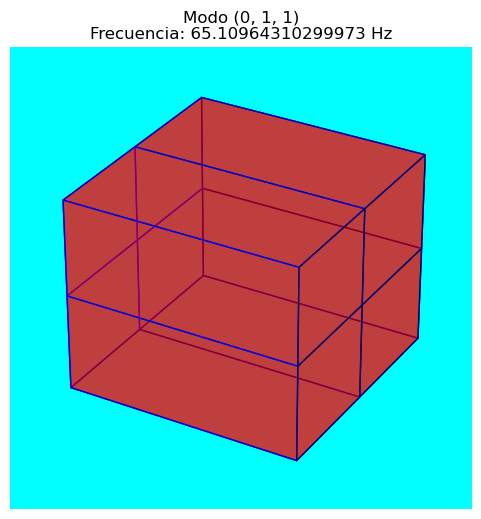

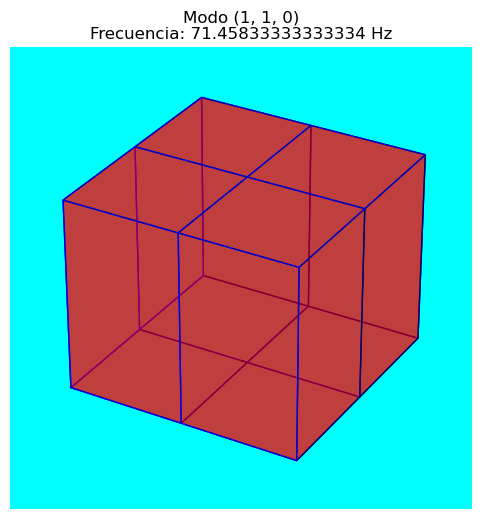

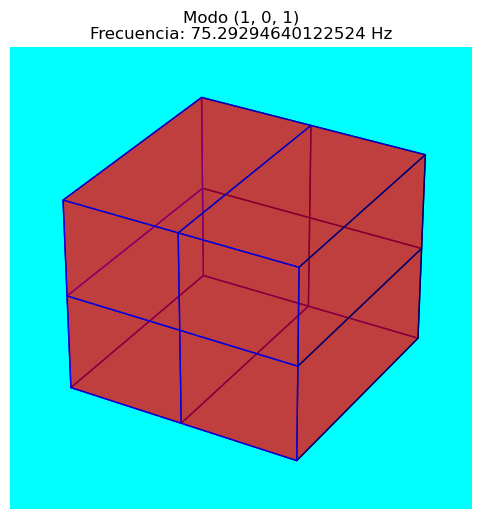

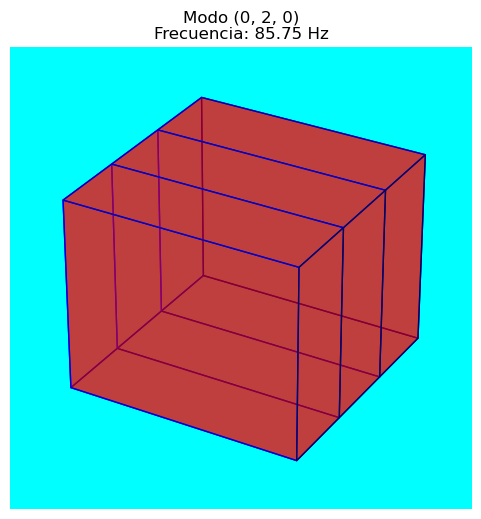

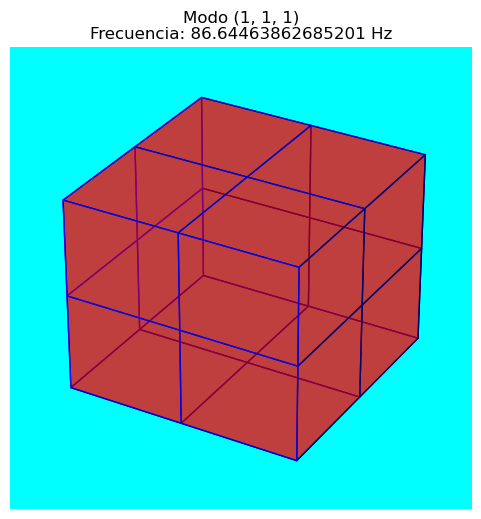

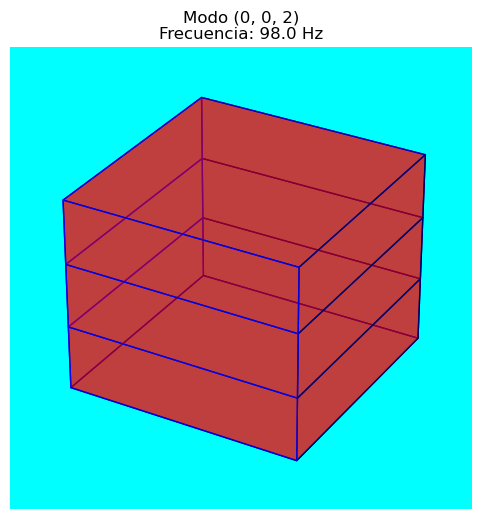

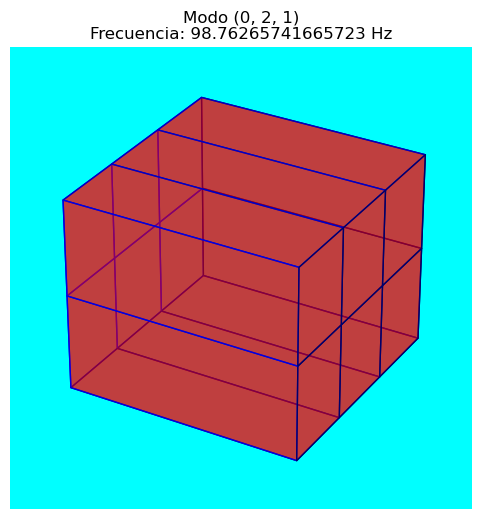

In [8]:
def plot_modos():
    for i, (nx, ny, nz, f) in enumerate(frecuencias[:10], 1):
        # Asegurar que nx, ny, nz son enteros no negativos
        nx, ny, nz = int(nx), int(ny), int(nz)
        if nx < 0 or ny < 0 or nz < 0:
            raise ValueError("Los modos (nx, ny, nz) deben ser no negativos.")
        
        # Crear cubo (ajusta según tu lógica de visualización)
        cube = np.ones((nx + 1, ny + 1, nz + 1), dtype=bool)
        
        # Configurar figura
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_facecolor('cyan')
        
        # Graficar voxels
        ax.voxels(cube, facecolor='r', edgecolors='b', alpha=0.5)
        ax.set_title(f'Modo ({nx}, {ny}, {nz})\nFrecuencia: {f} Hz')
        ax.axis('off')
    
    plt.show()  # Mostrar todas las figuras

# Llamar a la función sin parámetros
plot_modos()

In [9]:
def calcular_frecuencias(lx, ly, lz, c0=343, f_max=300):
    """Calcula las frecuencias modales hasta f_max en un recinto rectangular"""
    modos = []
    for nx, ny, nz in product(range(6), repeat=3):  # Hasta el quinto armónico
        if (nx, ny, nz) == (0, 0, 0):
            continue  # Omitir el modo trivial
        f = (c0 / 2) * np.sqrt((nx / lx) ** 2 + (ny / ly) ** 2 + (nz / lz) ** 2)
        if f <= f_max:
            modos.append(f)
    
    modos.sort()
    return np.array(modos)


In [10]:
def calcular_densidad_modal(lx, ly, lz, f_max=300, c0=343):
    """Calcula la densidad modal D(f) en un intervalo de frecuencia"""
    V = lx * ly * lz  # Volumen
    S = 2 * (lx * ly + lx * lz + ly * lz)  # Área total
    L = 4 * (lx + ly + lz)  # Perímetro total
    
    f_vals = np.linspace(0, f_max, 100)  # Rango de frecuencias
    D_f = (4 * np.pi * V / c0**3) * f_vals**2 + (np.pi * S / (2 * c0**2)) * f_vals + (L / (8 * c0))
    
    return f_vals, D_f

In [11]:
def evaluar_separacion(lx, ly, lz, f_max=300):
    """Evalúa la separación entre modos en un recinto dado"""
    freqs = calcular_frecuencias(lx, ly, lz, f_max=f_max)
    separaciones = np.diff(freqs)  # Diferencias entre modos consecutivos
    return np.std(separaciones)  # Desviación estándar como métrica de uniformidad

In [16]:
#Comparación de proporciones de salas:
dimensiones = {
    "Bolt (1:1.26:1.59)": (4, 5.04, 6.36),
    "Louden (1:1.4:1.9)": (4, 5.6, 7.6),
    "Proporción 1:1:1 (Cubo)": (4, 4, 4),
    "Proporción 1:2:3": (3, 6, 9),
    "Proporción": (3, 4, 3.5)
}

for nombre, (lx, ly, lz) in dimensiones.items():
    desviacion = evaluar_separacion(lx, ly, lz)
    print(f"{nombre}: Desviación estándar = {desviacion:.3f} Hz")

Bolt (1:1.26:1.59): Desviación estándar = 1.413 Hz
Louden (1:1.4:1.9): Desviación estándar = 1.360 Hz
Proporción 1:1:1 (Cubo): Desviación estándar = 3.173 Hz
Proporción 1:2:3: Desviación estándar = 1.744 Hz
Proporción: Desviación estándar = 2.019 Hz


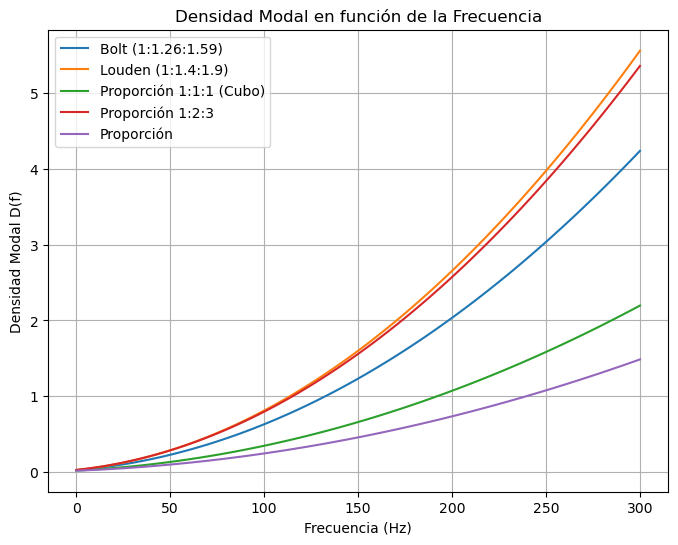

In [15]:
# 🔹 Graficar la densidad modal para cada configuración:
plt.figure(figsize=(8, 6))

for nombre, (lx, ly, lz) in dimensiones.items():
    f_vals, D_f = calcular_densidad_modal(lx, ly, lz)
    plt.plot(f_vals, D_f, label=nombre)

plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad Modal D(f)")
plt.title("Densidad Modal en función de la Frecuencia")
plt.legend()
plt.grid()
plt.show()